In [1]:
import pickle
import pandas as pd
import glob
import os
import fnmatch
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import numpy as np

In [2]:
mpl.rcParams["text.usetex"] = True
mpl.rcParams["axes.formatter.use_mathtext"] = True

### Condition Number v.s. Rank

In [3]:
filename_cond = 'condnum_rank/CIFAR10_1000_condnum.pickle'
filename_rank = 'condnum_rank/CIFAR10_1000_ranks.pickle'

with open(filename_cond, 'rb') as handle:
    stages = pickle.load(handle)

with open(filename_rank, 'rb') as handle:
    ranks = pickle.load(handle)

/var/folders/sy/f_pvhwlj30x1zk3j1ppfsbbw0000gn/T/ipykernel_36005/1786980622.py:8: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  ranks = pickle.load(handle)


In [4]:
x = list(map(str, ranks))
fig_path = '../../plots/fig_CIFAR10_1000_cond.pdf'

In [5]:
kappas = []
orders = ["1e-2", "1e-4", "1e-6", "1e-8"]
for order in orders:
    kappas.append(stages[order]["κ"])

kappas_str = [f"{kappa:.2e}".split("e") for kappa in kappas]
kappas_str = [ r'$\kappa(N_{\delta, k}) =' + kappa[0] + r'\times 10^{' + str(int(kappa[1]))+ '}$' for kappa in kappas_str]

kappas_str

['$\\kappa(N_{\\delta, k}) =3.10\\times 10^{6}$',
 '$\\kappa(N_{\\delta, k}) =8.22\\times 10^{8}$',
 '$\\kappa(N_{\\delta, k}) =7.24\\times 10^{10}$',
 '$\\kappa(N_{\\delta, k}) =1.51\\times 10^{15}$']

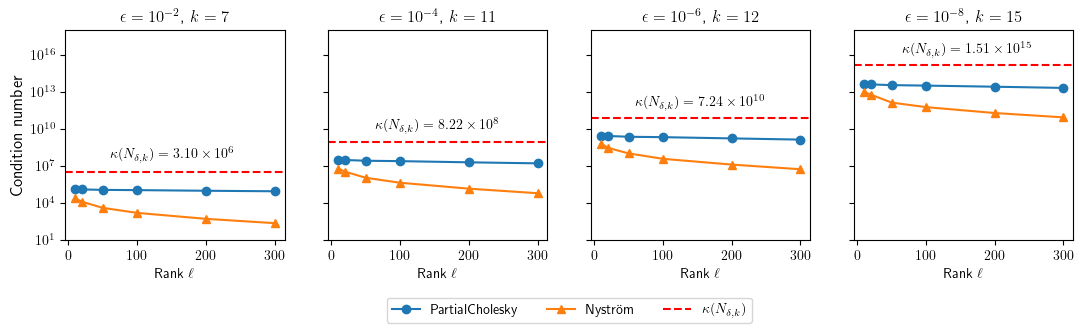

In [6]:
import matplotlib.pyplot as plt

# Assuming x, stages, and fig_path are already defined
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(12, 3))

# Define labels for the legend
label1 = "PartialCholesky"
label2 = "Nyström"

# Plotting for the first subplot
axes[0].plot(ranks, stages["1e-2"]["κs_PC"], 'o-', label=label1)
axes[0].plot(ranks, stages["1e-2"]["κs_Nys"], '^-', label=label2)
axes[0].axhline(y=stages["1e-2"]["κ"], color='r', linestyle='--', label=r'$\kappa(N_{\delta, k})$')
axes[0].text(.77, .44, kappas_str[0], ha='right', va='top', transform=axes[0].transAxes)
axes[0].set_title(r'$\epsilon=10^{-2}$, $k = 7$')
axes[0].set_xlabel(r'Rank $\ell$')
axes[0].ticklabel_format(axis="y", style="sci")
axes[0].set_yscale('log')
axes[0].set_ylim(1e1, 1e18)


# Plotting for the second subplot
axes[1].plot(ranks, stages["1e-4"]["κs_PC"], 'o-', label=label1)
axes[1].plot(ranks, stages["1e-4"]["κs_Nys"], '^-', label=label2)
axes[1].axhline(y=stages["1e-4"]["κ"], color='r', linestyle='--')
axes[1].text(1.98, .58, kappas_str[1], ha='right', va='top', transform=axes[0].transAxes)
axes[1].set_title(r'$\epsilon=10^{-4}$, $k = 11$')
axes[1].set_xlabel(r'Rank $\ell$')
# axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[1].set_yscale('log')


# Plotting for the third subplot
axes[2].plot(ranks, stages["1e-6"]["κs_PC"], 'o-', label=label1)
axes[2].plot(ranks, stages["1e-6"]["κs_Nys"], '^-', label=label2)
axes[2].axhline(y=stages["1e-6"]["κ"], color='r', linestyle='--')
axes[2].text(3.19, .69, kappas_str[2], ha='right', va='top', transform=axes[0].transAxes)
axes[2].set_title(r'$\epsilon=10^{-6}$, $k = 12$')
axes[2].set_xlabel(r'Rank $\ell$')
# axes[2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[2].set_yscale('log')

# Plotting for the fourth subplot
axes[3].plot(ranks, stages["1e-8"]["κs_PC"], 'o-', label=label1)
axes[3].plot(ranks, stages["1e-8"]["κs_Nys"], '^-', label=label2)
axes[3].axhline(y=stages["1e-8"]["κ"], color='r', linestyle='--')
axes[3].text(4.41, .94, kappas_str[3], ha='right', va='top', transform=axes[0].transAxes)
axes[3].set_title(r'$\epsilon=10^{-8}$, $k = 15$')
axes[3].set_xlabel(r'Rank $\ell$')
# axes[3].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[3].set_yscale('log')

# Set a super ylabel
fig.supylabel("Condition number", ha='center')

# Create a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48, -0.15))

# Adjust the subplots to make room for the legend
plt.subplots_adjust(left=0.06, bottom=0.15, top=0.85)

# Save the figure
plt.savefig(fig_path, format='pdf', bbox_inches = 'tight')
plt.show() # To display the plot in a Python environment

In [7]:
# Print the minimum Nyström condition number for each epsilon in scientific notation
for order in orders:
    print(f"min κ(N_δ) for ε={order}: {min(stages[order]['κs_Nys']):.2e}")

min κ(N_δ) for ε=1e-2: 2.28e+02
min κ(N_δ) for ε=1e-4: 6.07e+04
min κ(N_δ) for ε=1e-6: 5.28e+06
min κ(N_δ) for ε=1e-8: 8.41e+10


### Time v.s. Rank

In [8]:
# Specify directory and file names
directory = 'time_rank'
problem_name = 'RNASeq'

# Find the most recent CSV file in the directory
files = glob.glob(os.path.join(directory, f'*{problem_name}_averaged_time.csv'))
file = max(files, key=os.path.getmtime)
print("Latest file:", file)

# Read the CSV file into a DataFrame
df = pd.read_csv(file)

# Create a new column 'RemainingTime'
df['RemainingTime'] = df['IPPMM_time'] - df['TotalElapsedConstructPrecond'] - df['TotalElapsedCGsolving']

df.head()


Latest file: time_rank/old_RNASeq_averaged_time.csv


,Preconditioner,rank,IPPMM_time,TotalElapsedConstructPrecond,TotalElapsedCGsolving,RemainingTime
0,PartialCholesky,50,1891.004112,914.054102,976.767804,0.182207
1,PartialCholesky,100,1857.571669,887.939279,969.455570,0.176820
2,PartialCholesky,200,1760.227417,687.224675,1072.779841,0.222901
3,PartialCholesky,300,1781.384763,632.584554,1148.655115,0.145094
4,PartialCholesky,400,1907.568515,674.607514,1232.813557,0.147444


In [9]:
# Compute the percentage of time spent in each stage
df['RemainingTime_Percentage'] = (df['RemainingTime'] / df['IPPMM_time']) * 100
df['TotalElapsedConstructPrecond_Percentage'] = (df['TotalElapsedConstructPrecond'] / df['IPPMM_time']) * 100
df['TotalElapsedCGsolving_Percentage'] = (df['TotalElapsedCGsolving'] / df['IPPMM_time']) * 100

In [10]:
# Sort the DataFrame by the 'rank'
df.sort_values(['Preconditioner', 'rank'], inplace=True)
# Display the first few rows of the DataFrame
df.head()

,Preconditioner,rank,IPPMM_time,TotalElapsedConstructPrecond,TotalElapsedCGsolving,RemainingTime,RemainingTime_Percentage,TotalElapsedConstructPrecond_Percentage,TotalElapsedCGsolving_Percentage
12,Nystrom,50,54.331525,2.200676,52.004687,0.126162,0.232208,4.050458,95.717334
13,Nystrom,100,45.546103,4.468559,40.958930,0.118614,0.260426,9.811068,89.928506
14,Nystrom,200,39.599571,8.588469,30.890803,0.120299,0.303790,21.688287,78.007924
15,Nystrom,300,36.160259,12.229264,23.817187,0.113808,0.314733,33.819625,65.865642
16,Nystrom,400,39.152224,17.375459,21.625090,0.151675,0.387398,44.379240,55.233363


In [11]:
# Create a DataFrame for each preconditioner
Nys_df = df[(df['Preconditioner'] == 'Nystrom') & (df['rank'].isin([50, 100, 200, 300, 400, 500, 600, 700, 800, 900]))]
PC_df = df[(df['Preconditioner'] == 'PartialCholesky') & (df['rank'].isin([50, 100, 200, 300, 400, 500, 600, 700, 800, 900]))]

In [12]:
# Extract unique values from the 'rank' column
ranks = Nys_df['rank'].unique()
# Convert the list of integers to a list of strings
ranks_str = list(map(str, ranks))
# Display or use the result
print(ranks_str)

['50', '100', '200', '300', '400', '500', '600', '700', '800', '900']


In [20]:
width = 0.3
num_rank = len(ranks)
x_loc_Nys = np.arange(num_rank) - width/2 - 0.09
x_loc_PC = np.arange(num_rank) + width/2 + 0.09
Times_type = {'remain': 'RemainingTime', 'construct': 'TotalElapsedConstructPrecond', 'cg': 'TotalElapsedCGsolving'}
colors = {'remain': '#00BA38', 'construct': '#F8766D', 'cg': '#619CFF'}
textcolor = 'blue'
time_fig_path = '../../plots/SVM/time_rank/fig_'+problem_name+'_time.pdf'

if not os.path.exists(os.path.dirname(time_fig_path)):
    os.makedirs(os.path.dirname(time_fig_path))

<>:27: SyntaxWarning: invalid escape sequence '\%'
<>:64: SyntaxWarning: invalid escape sequence '\%'
<>:27: SyntaxWarning: invalid escape sequence '\%'
<>:64: SyntaxWarning: invalid escape sequence '\%'
/var/folders/sy/f_pvhwlj30x1zk3j1ppfsbbw0000gn/T/ipykernel_36005/3986531382.py:27: SyntaxWarning: invalid escape sequence '\%'
  plt.text(text_x_loc, text_y_loc, f"{perc:.1f}\%",
/var/folders/sy/f_pvhwlj30x1zk3j1ppfsbbw0000gn/T/ipykernel_36005/3986531382.py:64: SyntaxWarning: invalid escape sequence '\%'
  plt.text(text_x_loc, text_y_loc, f"{perc:.1f}\%",


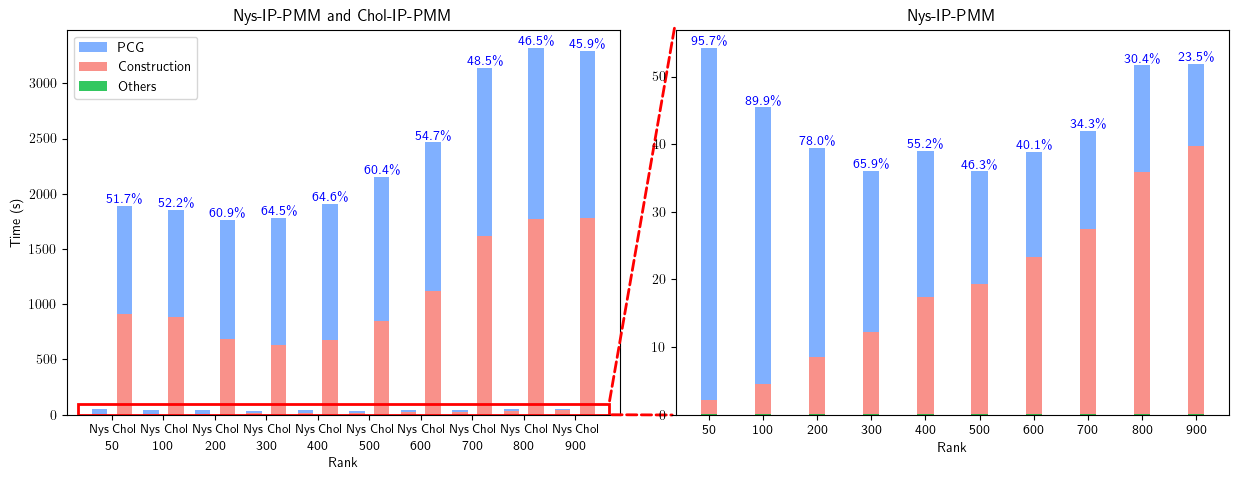

In [21]:
plt.figure(figsize=(15.0, 5.0))

ax1 = plt.subplot(1, 2, 1)

# For the Nyström preconditioner
bars = plt.bar(x_loc_Nys, Nys_df['TotalElapsedCGsolving'], width, 
               color=colors['cg'], bottom=Nys_df[Times_type['construct']], 
               alpha=0.8, label="PCG")
# for rect, perc in zip(bars, Nys_df['TotalElapsedCGsolving_Percentage']):
#     text_x_loc = rect.get_x()+rect.get_width()/2.0
#     text_y_loc = rect.get_y()+rect.get_height()
#     plt.text(text_x_loc, text_y_loc, f"{perc:.1f}\%", 
#              horizontalalignment="center", verticalalignment="bottom", color=textcolor)

bars = plt.bar(x_loc_Nys, Nys_df[Times_type['construct']], width, 
               color=colors['construct'], alpha=0.8, label="Construction")

bars = plt.bar(x_loc_Nys, Nys_df[Times_type['remain']], width, 
               color=colors['remain'], alpha=0.8, label="Others")


# For the PartialCholesky preconditioner
bars = plt.bar(x_loc_PC, PC_df['TotalElapsedCGsolving'], width, color=colors['cg'], bottom=PC_df['TotalElapsedConstructPrecond'], alpha=0.8)
for rect, perc in zip(bars, PC_df['TotalElapsedCGsolving_Percentage']):
    text_x_loc = rect.get_x()+rect.get_width()/2.0
    text_y_loc = rect.get_y()+rect.get_height()
    plt.text(text_x_loc, text_y_loc, f"{perc:.1f}\%", 
             horizontalalignment="center", verticalalignment="bottom", color=textcolor)

bars = plt.bar(x_loc_PC, PC_df[Times_type['construct']], width, color=colors['construct'], alpha=0.8)

bars = plt.bar(x_loc_PC, PC_df[Times_type['remain']], width, color=colors['remain'], alpha=0.8)


# Add text labels "Nyström" and "PChol" to the plot
for loc in x_loc_Nys:
    plt.annotate('Nys', (loc, 0), (0, -11), xycoords='data', textcoords='offset points', 
                 va='center', ha='center', color='black', fontsize=9)
for loc in x_loc_PC:
    plt.annotate('Chol', (loc, 0), (0, -11), xycoords='data', textcoords='offset points', 
                 va='center', ha='center', color='black', fontsize=9)


plt.legend(loc='upper left')
# plt.yscale('log')
plt.xticks(np.arange(num_rank), ranks_str, y = -0.04)
plt.xlabel('Rank')
plt.ylabel('Time (s)')
plt.title('Nys-IP-PMM and Chol-IP-PMM')


# Second plot
ax2 = plt.subplot(1, 2, 2)

x_loc = np.arange(num_rank)

# For the Nyström preconditioner
bars = plt.bar(x_loc, Nys_df['TotalElapsedCGsolving'], width, 
               color=colors['cg'], bottom=Nys_df[Times_type['construct']], 
               alpha=0.8, label="PCG")
for rect, perc in zip(bars, Nys_df['TotalElapsedCGsolving_Percentage']):
    text_x_loc = rect.get_x()+rect.get_width()/2.0
    text_y_loc = rect.get_y()+rect.get_height()
    plt.text(text_x_loc, text_y_loc, f"{perc:.1f}\%", 
             horizontalalignment="center", verticalalignment="bottom", color=textcolor)

bars = plt.bar(x_loc, Nys_df[Times_type['construct']], width, 
               color=colors['construct'], alpha=0.8, label="Construction")

bars = plt.bar(x_loc, Nys_df[Times_type['remain']], width, 
               color=colors['remain'], alpha=0.8, label="Others")

plt.xticks(np.arange(num_rank), ranks_str)
plt.xlabel('Rank')
plt.title('Nys-IP-PMM')
plt.subplots_adjust(wspace=0.1)

# Add a zooming box
left = x_loc_Nys[0]-1.4*width
right = x_loc_PC[-1]+1.4*width
length = right-left
rect = Rectangle([left, 0.0], length, 100.0, linewidth=2, edgecolor='r', fill=False)
ax1.add_patch(rect)
srcCorners = rect.get_corners()
dstCorners = [[0.45, 0.13], [0.45, 0.91]] #ax2.get_position().corners() 
src = [1, 2]; dst = [0, 1]
for k in range(2):
    ax1.annotate('', xy=dstCorners[dst[k]], xytext=srcCorners[src[k]], xycoords='figure fraction', textcoords='data', arrowprops=dict(arrowstyle='-', color='r', linewidth=2, linestyle='dashed'))
    
plt.savefig(time_fig_path, format='pdf', bbox_inches = 'tight')
plt.show()